In [99]:
import numpy as np
import pandas as pd

In [100]:
df=pd.read_csv('spam2.csv',usecols=['spamORham','Message'])

In [101]:
df.head(5)

,spamORham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df3=pd.read_csv('SPAM_SMS.csv',usecols=['text'])

In [234]:
df3.head(5)

,text
0,Live DJ and awesome music waiting for you. Dro...
1,"Smart reminds you:Your Reward Points (6,309) e..."
2,"Smart reminds you:Your Reward Points (6,309) e..."
3,"Smart reminds you:Your Reward Points (6,309) e..."
4,Hello good day! :)\nCommercial lots in the fir...


In [104]:
df3.dropna(inplace=True)

In [263]:
df3['target']=1
df3 = df3.drop_duplicates()
df3.head()

,target,text
0,1,Live DJ and awesome music waiting for you. Dro...
1,1,"Smart reminds you:Your Reward Points (6,309) e..."
2,1,"Smart reminds you:Your Reward Points (6,309) e..."
3,1,"Smart reminds you:Your Reward Points (6,309) e..."
4,1,Hello good day! :)\nCommercial lots in the fir...


In [265]:
df.rename(columns={'spamORham':'target','Message':'text'},inplace=True)
df.shape
df3.shape

(1009, 2)

In [267]:
df3 = df3[['target', 'text']]

# Merge them
df = pd.concat([df, df3], ignore_index=True)

# Shuffle the merged dataset
df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [269]:
from sklearn.preprocessing import LabelEncoder           #ebncoding spam as 1 and normal messages as 0
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [271]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
478,1,You have been restricted due to multiple login...,NaN,NaN,NaN,NaN
5303,1,BDO-ALERT : Your registered mobile number need...,NaN,NaN,NaN,NaN
383,0,Now only i reached home. . . I am very tired n...,71.0,19.0,6.0,reach home tire come tomorro
2582,0,Ok thanx...,11.0,3.0,1.0,ok thanx
4355,0,Crucify is c not s. You should have told me ea...,52.0,12.0,1.0,crucifi c told earlier


In [273]:
df.isnull().sum()

target                 0
text                   0
num_characters      1009
num_words           1009
num_sentences       1009
transformed_text    1009
dtype: int64

In [275]:
df3.duplicated().sum()

0

In [277]:
df3.isnull().sum()

target    0
text      0
dtype: int64

In [279]:
df3.shape

(1009, 2)

In [281]:
df = df.drop_duplicates(keep='first')

In [283]:
df3 = df3.drop_duplicates(keep='first')

In [285]:
df['target'].value_counts()

target
0    4516
1    1662
Name: count, dtype: int64

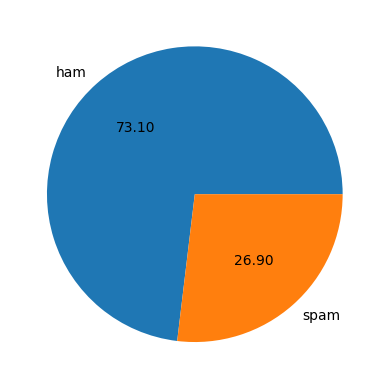

In [287]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [288]:
import nltk
!pip install nltk
nltk.download('punkt')    # old main tokenizer model
nltk.download('punkt_tab')   # new table resource in newer NLTK versions


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gadit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gadit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [290]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,09066362231 URGENT! Your mobile No 07xxxxxxxxx...,153,29.0,4.0,09066362231 urgent mobil 07xxxxxxxxx bonu call...
1,0,Wat would u like 4 ur birthday?,31,8.0,1.0,wat would u like 4 ur birthday
2,0,"Hey , is * rite u put åÈ10 evey mnth is that all?",49,14.0,1.0,hey rite u put åè10 evey mnth
3,1,\nCelebrate Independence Day at Vu's Bar Sky B...,406,NaN,NaN,NaN
4,0,Update your face book status frequently :),42,8.0,1.0,updat face book statu frequent


In [293]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df[['num_characters','num_words','num_sentences']].describe()
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
1588,0,Mm yes dear look how i am hugging you both. :-P,47,13,2,mm ye dear look hug
5260,1,"<REAL NAME>, Complete daily tasks to get 1000 ...",115,24,3,NaN
5413,0,Not yet had..ya sapna aunty manege y'day hogid...,94,19,1,yet ya sapna aunti maneg hogidh chinnu full we...
1534,0,I anything lor.,15,4,1,anyth lor
3202,0,"Goodmorning, Today i am late for &lt;#&gt; min.",48,16,1,goodmorn today late lt gt min


In [294]:
# ham description
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [295]:
#spam description
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1662.000000,1662.000000,1662.000000
mean,144.580626,27.976534,2.782792
std,70.193852,13.760226,1.389430
min,5.000000,1.000000,1.000000
25%,111.000000,21.000000,2.000000
50%,141.000000,27.000000,3.000000
75%,157.000000,32.000000,4.000000
max,787.000000,154.000000,9.000000


In [296]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

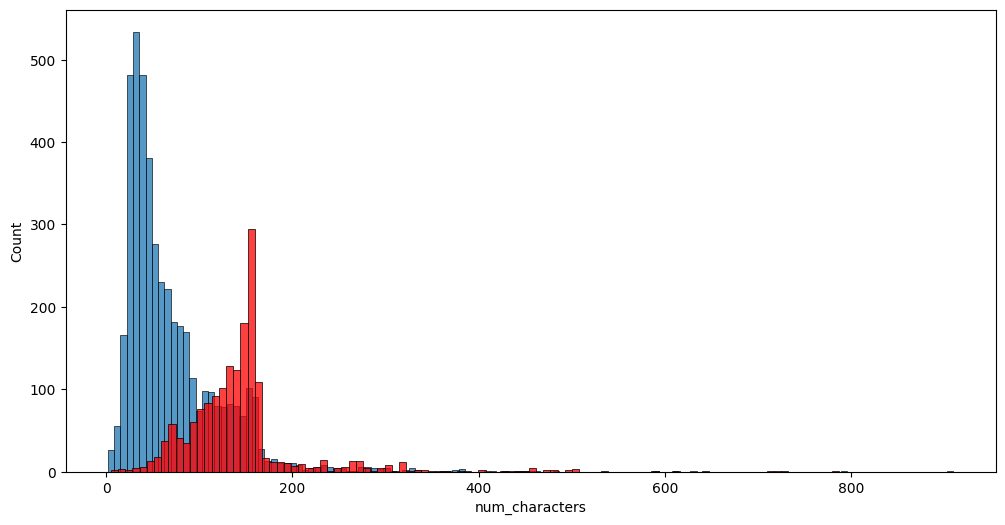

In [297]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

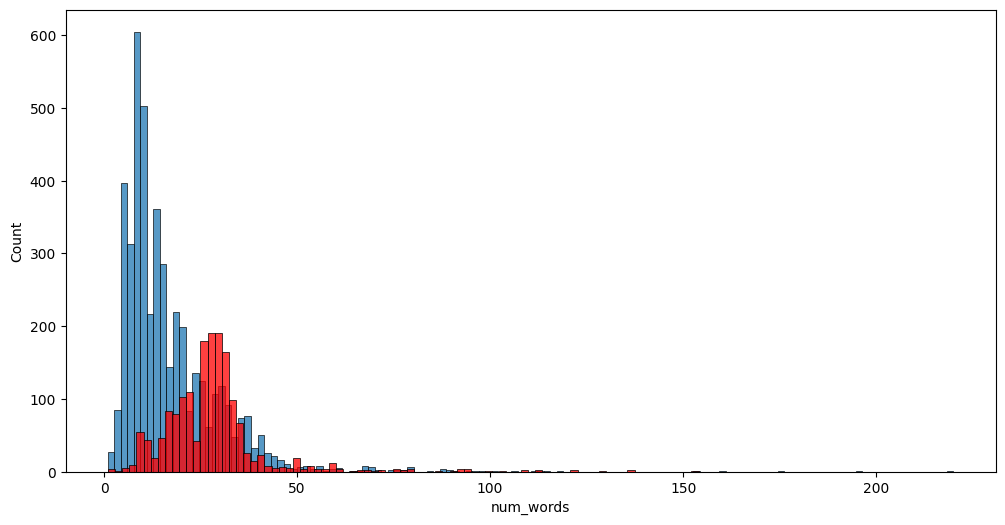

In [298]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

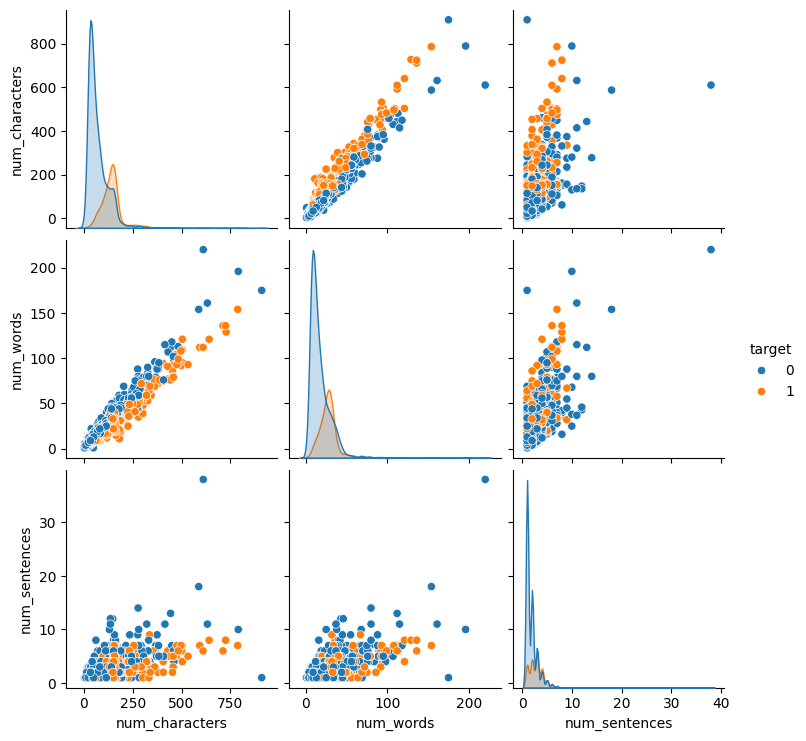

In [299]:
sns.pairplot(df,hue='target')

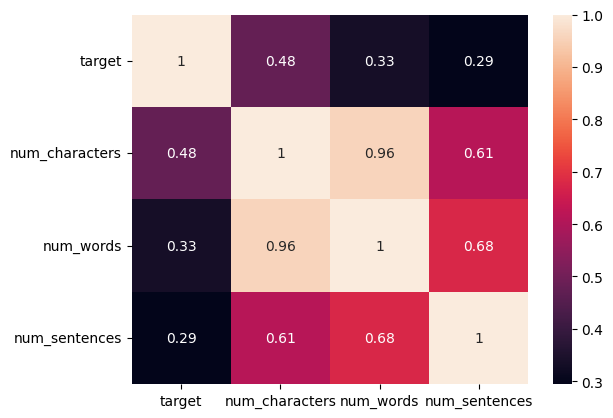

In [307]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [309]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

print(stop_words)


{"he'll", "she'll", "weren't", "i'll", "mightn't", 'now', "mustn't", 'doesn', 'this', 'a', 'off', 'any', 'and', 'ourselves', "it'll", "we'd", "haven't", 'between', 'yourselves', 'by', "isn't", 'such', 'won', 'each', "i've", 'have', 'on', "you've", 'out', 'd', 'into', "we're", "you'll", 'most', 'those', 'being', 'or', 'over', "they'll", 'isn', "they've", 'nor', 'an', "it'd", 'ma', "that'll", 've', 'themselves', 'more', 'not', 'i', 'his', 'in', 'shouldn', 'no', 'our', 'to', 'herself', 'll', 'mightn', 'needn', "she's", "she'd", 'with', 'your', "they'd", 'too', 'what', 'only', 'before', 'ours', 'don', 'were', 'under', 'she', "you'd", 'there', "shan't", "we've", 'couldn', 'above', 'will', 'y', 're', 'at', 'did', "should've", 'through', 'was', 'from', 'am', 'until', 'for', 'weren', 'having', "aren't", 'some', 'aren', 'doing', 'haven', 'hasn', 'once', 'wouldn', 'but', 'himself', "shouldn't", 'the', 'are', 'when', 'against', 'both', 'hers', 'yourself', "wouldn't", 'it', 'which', 'been', 'where

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gadit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [311]:
import string

In [313]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [315]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [317]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [319]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [321]:
df['transformed_text'] = df['text'].apply(transform_text)

In [323]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,09066362231 URGENT! Your mobile No 07xxxxxxxxx...,153,29,4,09066362231 urgent mobil 07xxxxxxxxx bonu call...
1,0,Wat would u like 4 ur birthday?,31,8,1,wat would u like 4 ur birthday
2,0,"Hey , is * rite u put åÈ10 evey mnth is that all?",49,14,1,hey rite u put åè10 evey mnth
3,1,\nCelebrate Independence Day at Vu's Bar Sky B...,406,94,4,celebr independ day vu bar sky bar loung indep...
4,0,Update your face book status frequently :),42,8,1,updat face book statu frequent


In [325]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [327]:
!pip install wordcloud

In [329]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

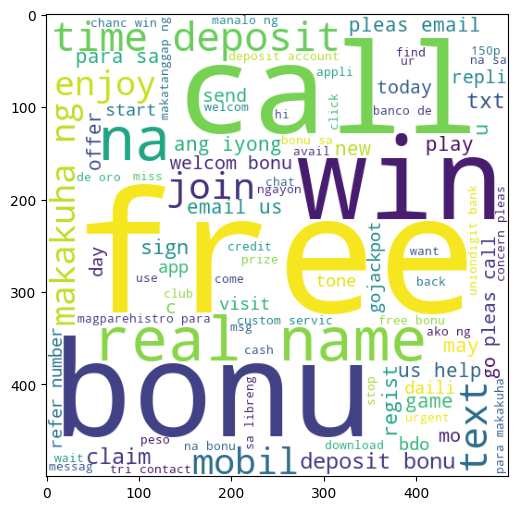

In [331]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [333]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

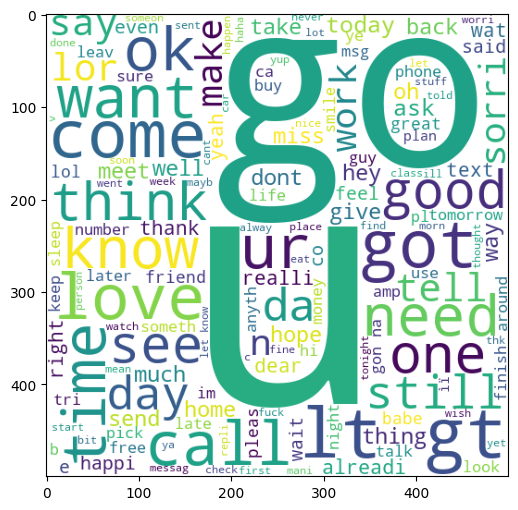

In [335]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


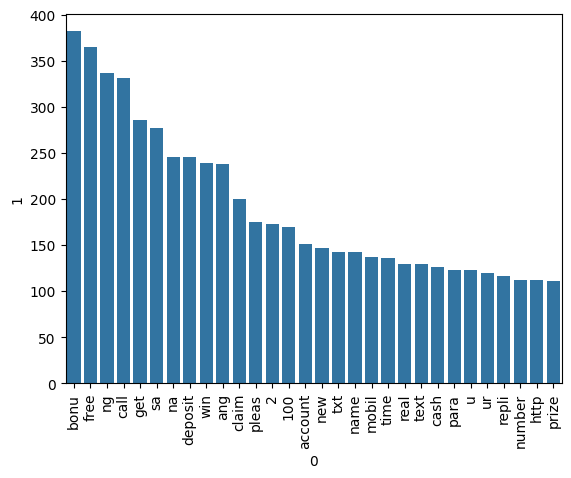

In [337]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

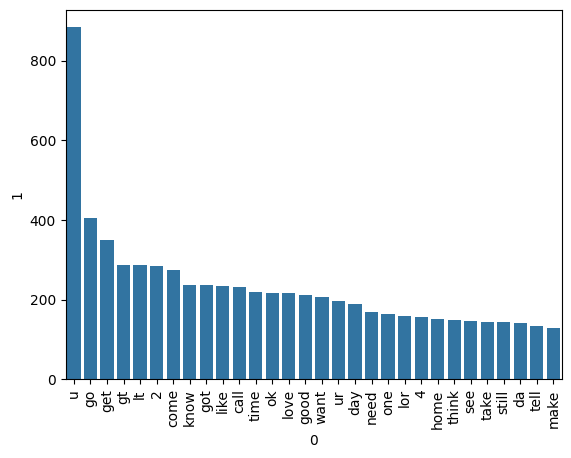

In [339]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building

In [342]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [344]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [346]:
y = df['target'].values

In [348]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [350]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train, y_train)


ExtraTreesClassifier(n_estimators=50, random_state=2)

In [352]:
y_pred = etc.predict(X_test)

In [354]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.9789644012944984
Confusion Matrix:
 [[912   4]
 [ 22 298]]
Precision: 0.9867549668874173
